<a href="https://colab.research.google.com/github/andriellymoraespereira/analise-de-visitas-em-ecommerce/blob/main/04_Segmenta%C3%A7%C3%A3o__Clientes_com_Base_no_Valor_N%C3%BAmero_Compras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='purple'>Andrielly Moraes Pereira</fonte>
# <font color='purple'>Business Analytics</fonte> - Segmentação de Clientes

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Pyton Usada Nesse Jupyter Notebook:', python_version())

# **Iniciando o Projeto**

In [4]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark.
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
# import

# manipulação e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from IPython.display import Image, display
from google.colab import drive
drive.mount('/content/drive')


# Formatação dos gráficos
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
%matplotlib inline

Mounted at /content/drive


<Figure size 1500x600 with 0 Axes>

In [5]:
# Versões dos pacotes usados neste notebook
%reload_ext watermark
%watermark -a "Andrielly" --iversions

Author: Andrielly

pandas    : 2.1.4
numpy     : 1.26.4
seaborn   : 0.13.1
google    : 2.0.3
matplotlib: 3.7.1



Saving imag.png to imag (1).png


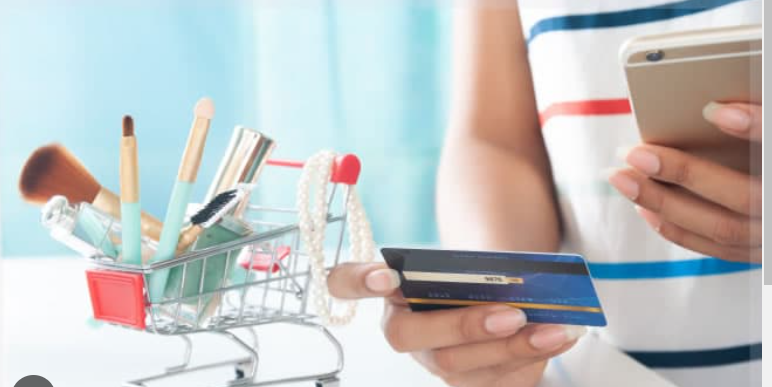

In [3]:
#  Fazer upload da imagem
from google.colab import files
uploaded = files.upload()

# Exibir a imagem
display(Image('imag.png'))

### **Carregando e Compreendendo os Dados**

In [6]:
# Carregar o dataset a partir do Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/cleaned_data.csv')

In [7]:
# shape
df.shape

(4997407, 9)

In [8]:
# visualizar os dados
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,Unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


### **Análise Exploratória**

Vamos explorar os dados por diferentes perspectivas e compreender um pouco mais o relacionamento entre as variáveis.

In [9]:
# verificação dos valores unicos por coluna
df.nunique()

,0
event_time,281422
event_type,3
product_id,114030
category_id,616
category_code,124
brand,3184
price,28628
user_id,643539
user_session,1104188


In [10]:
# tipos de dados
df.dtypes

,0
event_time,object
event_type,object
product_id,int64
category_id,int64
category_code,object
brand,object
price,float64
user_id,int64
user_session,object


In [11]:
# resumo das colunas númerica
df.describe()

,product_id,category_id,price,user_id
count,4.997407e+06,4.997407e+06,4.997407e+06,4.997407e+06
mean,1.082551e+07,2.057728e+18,2.947184e+02,5.353039e+08
std,1.217100e+07,1.923921e+16,3.512965e+02,2.024985e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,2.144703e+08
25%,1.005229e+06,2.053014e+18,6.947000e+01,5.159667e+08
50%,5.100378e+06,2.053014e+18,1.700700e+02,5.306437e+08
75%,1.600103e+07,2.053014e+18,3.694500e+02,5.546497e+08
max,6.170001e+07,2.180737e+18,2.574070e+03,5.673604e+08


# Segmentação de Clientes

Segmentar clientes é fundamental para entender diferentes comportamentos e otimizar estratégias de marketing. Vamos segmentar os clientes com base no valor total das compras e no número de compras realizadas. Para isso, seguiremos os passos abaixo:



1.   Agrupar pelo cliente e contar o número de compras: A primeira etapa agrupa os dados pelo user_id e conta quantas compras cada cliente fez.
2.   Segmentar os clientes: Usar pd.qcut com duplicates='drop' segmenta os clientes em três grupos (baixo, médio e alto) com base no número de compras, tratando corretamente os valores duplicados.
3.   Visualizar a segmentação: Utilizar seaborn e matplotlib para visualizar a distribuição dos segmentos e verificar se a segmentação está correta.

Essa abordagem deve lidar com a repetição de clientes e criar uma segmentação precisa.

**1. Agrupar pelo cliente e contar o número de compras**

In [12]:
# Agrupar pelo cliente e contar o número de compras
customer_purchase_counts = df.groupby('user_id').size().reset_index(name='purchase_count')

# Verificar os primeiros registros para confirmar
print(customer_purchase_counts.head())


     user_id  purchase_count
0  214470341               1
1  216064734               1
2  245978545               2
3  249991351               1
4  253624608               3



**2. Segmentar os clientes**

In [13]:
# Usar pd.qcut com duplicates='drop' para lidar com valores duplicados
customer_purchase_counts['frequency_segment'] = pd.qcut(customer_purchase_counts['purchase_count'], q=3, labels=['baixo', 'médio', 'alto'], duplicates='drop')

# Verificar a distribuição dos segmentos
print(customer_purchase_counts['frequency_segment'].value_counts())

frequency_segment
baixo    255424
alto     204654
médio    183461
Name: count, dtype: int64


In [14]:
# Mesclar a segmentação de volta ao DataFrame original
df = df.merge(customer_purchase_counts[['user_id', 'frequency_segment']], on='user_id', how='left')

# Verificar se a mesclagem foi bem-sucedida
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,frequency_segment
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,alto
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283,baixo
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,Unknown,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387,alto
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f,alto
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2,médio


**Segmentação 1 - Visualização e Interpretação dos Segmentos**

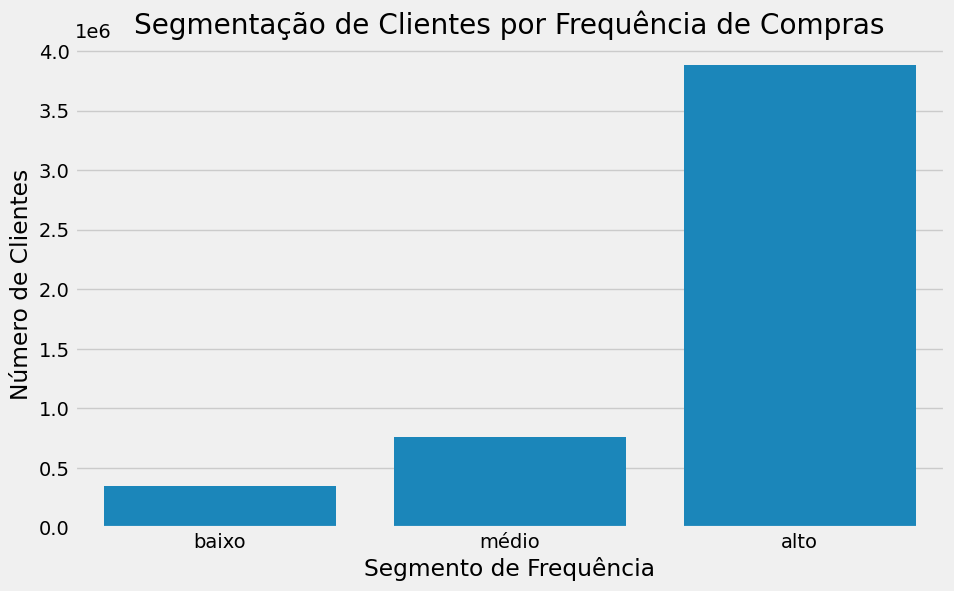

In [26]:
# Plotar a distribuição dos segmentos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='frequency_segment')
plt.title('Segmentação de Clientes por Frequência de Compras')
plt.xlabel('Segmento de Frequência')
plt.ylabel('Número de Clientes')
plt.show()

Esse gráfico de segmentação de clientes por frequência de compras mostra como os clientes estão distribuídos em três segmentos diferentes: "baixo", "médio" e "alto", com base na frequência de suas compras.

**Interpretação**:

**Segmento "alto" (à direita):**


*  Número elevado de clientes: A maior parte dos clientes pertence a esse segmento.
*   Clientes frequentes: Esses são os clientes que compram com mais frequência na loja, o que pode indicar um alto nível de lealdade ou dependência da loja.
*   Potencial de receita: Esses clientes são extremamente valiosos e podem ser um foco principal em estratégias de retenção e fidelização.

**Segmento "médio" (ao centro):**



*   Número moderado de clientes: Um número significativo de clientes faz parte desse segmento, indicando uma frequência de compra moderada.
*   Oportunidade de crescimento: Esses clientes podem ser incentivados a aumentar sua frequência de compras, por exemplo, através de promoções ou programas de fidelidade.

**Segmento "baixo" (à esquerda):**


*   Número reduzido de clientes: Um menor número de clientes está nesse segmento, indicando que compram com menos frequência.
*   Clientes ocasionais: Esses são clientes que compram de forma esporádica, o que pode sugerir uma menor lealdade ou um interesse menor nos produtos/serviços oferecidos.


*   Estratégias de engajamento: Esses clientes podem precisar de estratégias de engajamento mais fortes, como ofertas especiais ou campanhas de remarketing, para incentivá-los a comprar com mais frequência.


**Conclusão:**
Esse gráfico sugere que a maioria dos clientes da loja é bastante ativa, comprando frequentemente (segmento "alto"). No entanto, existe um grupo significativo que compra com menos frequência (segmentos "médio" e "baixo"), representando uma oportunidade para aumentar o engajamento e a retenção. Estratégias personalizadas podem ser implementadas para cada segmento, visando maximizar o valor de cada grupo de clientes.






**4. Análise de Funil de Conversão**

In [15]:
# contar o número de eventos por tipo
eventos_counts = df['event_type'].value_counts()
print(eventos_counts)

event_type
view        4861431
purchase      73776
cart          62200
Name: count, dtype: int64


**Observação**:

A discrepância observada entre o número de compras(**purchase = 73776**) e o número de itens adicionados ao carrinho(**cart = 62200**) pode ser explicada por fatores como a utilização de compras rápidas, recompras, integrações com outros canais de venda e possíveis erros de rastreamento de eventos. Esse comportamento sugere que nem todas as compras seguem o fluxo tradicional de adição ao carrinho, refletindo a diversidade de interações dos usuários com a plataforma.

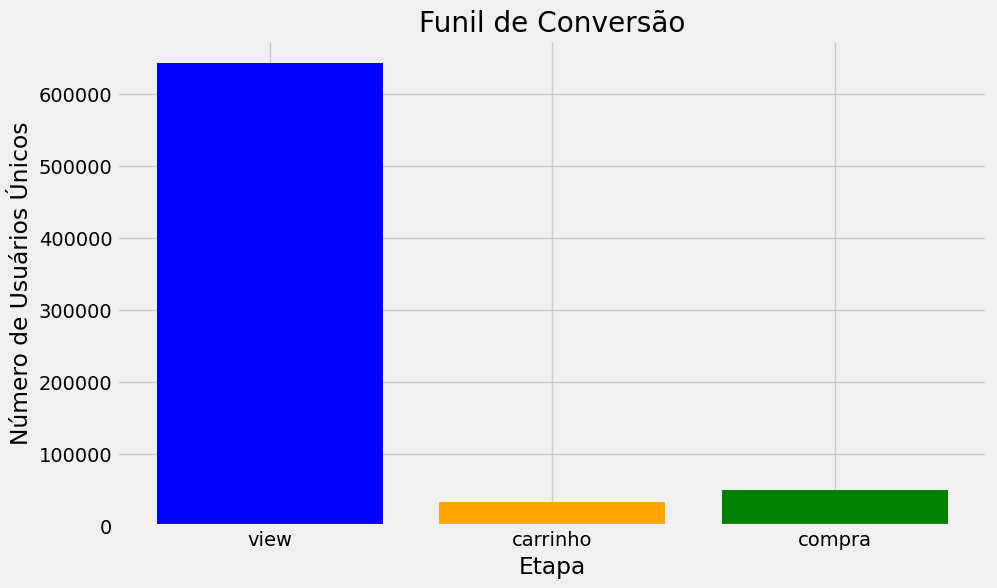

In [16]:
# Countar o número de usuários em cada etapa do funivel
view_users = df[df['event_type']=='view']['user_id'].nunique()
carrinho_users = df[df['event_type']=='cart']['user_id'].nunique()
compra_users = df[df['event_type']=='purchase']['user_id'].nunique()

# Criar um DataFrame com os dados do funil
dado_funil = pd.DataFrame({
    'stage': ['view','carrinho','compra'],
    'unique_users':[view_users, carrinho_users, compra_users]
})

# Plotar o funil de conversão
plt.figure(figsize=(10, 6))
plt.bar(dado_funil['stage'], dado_funil['unique_users'], color=['blue', 'orange', 'green'])
plt.title('Funil de Conversão')
plt.xlabel('Etapa')
plt.ylabel('Número de Usuários Únicos')
plt.show()

Esse gráfico representa um **funil de conversão** típico em ecommerce, mostrando a quantidade de usuários únicos que passam por cada etapa do processo de compra: **visualização do produto (view)**, **adição ao carrinho (carrinho)**  e **compra**.

**Interpretação:**

**View (Visualização):**


*   A maior parte dos usuários (mais de 600.000) está nesta etapa, o que é esperado, pois a visualização do produto é o primeiro ponto de contato que um usuário tem com a loja.
*   Interpretação: Há um interesse inicial significativo nos produtos, indicando que os usuários estão navegando e explorando o catálogo da loja.

**Carrinho:**


*   Há uma queda acentuada no número de usuários que adicionam produtos ao carrinho em comparação com aqueles que visualizam os produtos.
*   Interpretação: A queda pode indicar que, embora muitos usuários estejam interessados em visualizar os produtos, algo está impedindo-os de prosseguir para a etapa de adição ao carrinho. Isso pode ser devido a fatores como preços, falta de informações suficientes, experiência do usuário no site, entre outros.

**Compra:**


*   O número de usuários que finaliza a compra é ainda menor, representando uma queda adicional em relação à etapa de "carrinho".
*   Interpretação: A conversão efetiva de visualizações para compras é baixa, o que sugere que existem barreiras no funil de compra que precisam ser abordadas. Isso pode incluir problemas como altos custos de envio, falta de opções de pagamento, ou dificuldades na finalização do processo de compra.

**Conclusão:**

O funil de conversão mostra que, embora haja um grande número de visualizações de produtos, uma proporção muito menor desses usuários conclui uma compra. Isso indica que há oportunidades significativas para otimizar o processo de conversão, melhorando a experiência do usuário nas etapas intermediárias (como adicionar ao carrinho) e removendo obstáculos na finalização da compra. A análise mais aprofundada das razões para a queda entre as etapas pode ajudar a desenvolver estratégias eficazes para aumentar a taxa de conversão.


--------------------------------------------------------------------------------

# Análise mais aprofundada
**1. Segmentação de Clientes**
Vamos criar segmentos de clientes com base em seus comportamentos de compra, como valor gasto e frequência de compras.

**Análise de Recência, Frequência e Valor Monetário (RFM)**

A análise RFM é uma técnica de segmentação que categoriza os clientes com base em:

Recência (R): Quando foi a última compra do cliente.
Frequência (F): Quantas vezes o cliente comprou.
Valor Monetário (M): Quanto dinheiro o cliente gastou.

**Etapa 1: Calcular o Recency**

In [17]:
# Certifique-se de que a coluna 'event_time' esteja no formato datetime
df['event_time'] = pd.to_datetime(df['event_time'])

# Adicionar uma coluna com a data sem o tempo
df['event_date'] = df['event_time'].dt.date

# Calcular a última data de compra para cada cliente
last_purchase = df.groupby('user_id')['event_date'].max().reset_index()
last_purchase.columns = ['user_id', 'last_purchase_date']

# Converter a coluna 'last_purchase_date' para datetime
last_purchase['last_purchase_date'] = pd.to_datetime(last_purchase['last_purchase_date'])

# Calcular a recência
current_date = pd.to_datetime(df['event_time'].max().date())  # Converter current_date para datetime
last_purchase['recency'] = (current_date - last_purchase['last_purchase_date']).dt.days

# Verificar os primeiros registros
print(last_purchase.head())

     user_id last_purchase_date  recency
0  214470341         2019-11-04        0
1  216064734         2019-11-02        2
2  245978545         2019-11-03        1
3  249991351         2019-11-02        2
4  253624608         2019-11-04        0


**Etapa 2: Calcular a Frequência e o Valor Monetário (Monetary)**

In [18]:
# Calcular a frequência de compras e o valor monetário total
frequency_monetary = df.groupby('user_id').agg({
    'event_time': 'count',  # Contar o número de eventos de compra (frequência)
    'price': 'sum'  # Somar o valor gasto (valor monetário)
}).reset_index()

# Renomear as colunas
frequency_monetary.columns = ['user_id', 'frequency', 'monetary']

# Verificar os primeiros registros
print(frequency_monetary.head())


     user_id  frequency  monetary
0  214470341          1     64.04
1  216064734          1    526.40
2  245978545          2     77.18
3  249991351          1     87.52
4  253624608          3   3808.57


**Etapa 3: Unir Recência, Frequência e Valor Monetário**

In [19]:
# Unir recência, frequência e valor monetário
rfm = pd.merge(last_purchase[['user_id', 'recency']], frequency_monetary, on='user_id')

# Verificar os primeiros registros
print(rfm.head())

     user_id  recency  frequency  monetary
0  214470341        0          1     64.04
1  216064734        2          1    526.40
2  245978545        1          2     77.18
3  249991351        2          1     87.52
4  253624608        0          3   3808.57


**Etapa 4: Segmentação de Clientes**

In [20]:
# Definir as faixas para cada métrica RFM
rfm['R_Segment'] = pd.qcut(rfm['recency'], 3, labels=['Alto', 'Médio', 'Baixo'])
rfm['F_Segment'] = pd.qcut(rfm['frequency'], 3, labels=['Baixo', 'Médio', 'Alto'])
rfm['M_Segment'] = pd.qcut(rfm['monetary'], 3, labels=['Baixo', 'Médio', 'Alto'])

# Verificar os primeiros registros
print(rfm.head())

     user_id  recency  frequency  monetary R_Segment F_Segment M_Segment
0  214470341        0          1     64.04      Alto     Baixo     Baixo
1  216064734        2          1    526.40     Médio     Baixo     Médio
2  245978545        1          2     77.18      Alto     Baixo     Baixo
3  249991351        2          1     87.52     Médio     Baixo     Baixo
4  253624608        0          3   3808.57      Alto     Médio      Alto


**Etapa 5. Análise de Funil de Conversão**


Para realizar uma análise de funil de conversão, podemos identificar as diferentes etapas que os clientes passam antes de concluir uma compra e medir a taxa de conversão entre essas etapas. Por exemplo, supondo que as etapas sejam: view, cart, purchase, podemos fazer algo assim:

In [21]:
# Definir as etapas do funil
etapas_funil = ['view', 'cart', 'purchase']

# Calcular o número de usuários em cada etapa do funil
funil = df[df['event_type'].isin(etapas_funil)].groupby('event_type')['user_id'].nunique().reindex(etapas_funil)

# Calcular as taxas de conversão
funil = funil.to_frame().reset_index()
funil.columns = ['etapa', 'numero_usuarios']
funil['taxa_conversao'] = funil['numero_usuarios'] / funil['numero_usuarios'].shift(1)

# Ajustar a taxa de conversão da primeira etapa
funil.loc[0, 'taxa_conversao'] = 1

# Verificar os dados do funil
print(funil)


      etapa  numero_usuarios  taxa_conversao
0      view           643501        1.000000
1      cart            32648        0.050735
2  purchase            49314        1.510475


In [22]:
session_duration = df.groupby('user_session').agg(
    start_time=('event_time', 'min'),
    end_time=('event_time', 'max')
).reset_index()
session_duration['duration'] = (session_duration['end_time'] - session_duration['start_time']).dt.total_seconds() / 60

In [23]:
# Arredondar a duração da sessão para facilitar a interpretação
session_duration['duration'] = np.around(session_duration['duration'])

# Filtrar as sessões com duração máxima de 60 minutos
filtro_session_duration = session_duration[session_duration['duration']<30]

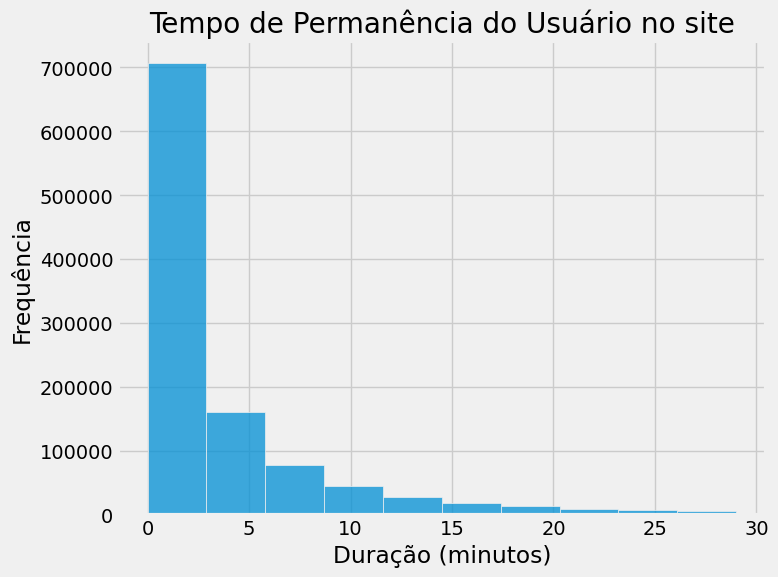

In [24]:
# Plotar e salvar a duração da sessão
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(filtro_session_duration['duration'], bins=10, ax=ax)
ax.set_title('Tempo de Permanência do Usuário no site')
ax.set_xlabel('Duração (minutos)')
ax.set_ylabel('Frequência')
plt.tight_layout()

Este gráfico mostra a distribuição do tempo de permanência dos usuários em um site. Aqui está uma interpretação:



1.   Distribuição Assimétrica: A maioria dos usuários passa muito pouco tempo no site, com a maior frequência de visitas sendo de menos de 5 minutos. Isso é indicado pela alta barra à esquerda, representando um grande número de visitas de curta duração.
2.   Queda Rápida na Frequência: À medida que o tempo de permanência aumenta, o número de usuários que permanecem no site diminui drasticamente. O gráfico mostra que poucas pessoas ficam por mais de 10 minutos.
3. Comportamento Típico em Sites de Alto Tráfego: Este tipo de distribuição é comum em muitos sites, onde um grande número de visitantes faz visitas breves, enquanto um pequeno número de usuários passa mais tempo interagindo com o conteúdo.

Em resumo, a maioria dos usuários visita o site por um curto período de tempo, com poucos usuários permanecendo por períodos mais longos.



**Visualização dos Resultados**

Podemos criar gráficos para visualizar a segmentação RFM e o funil de conversão.

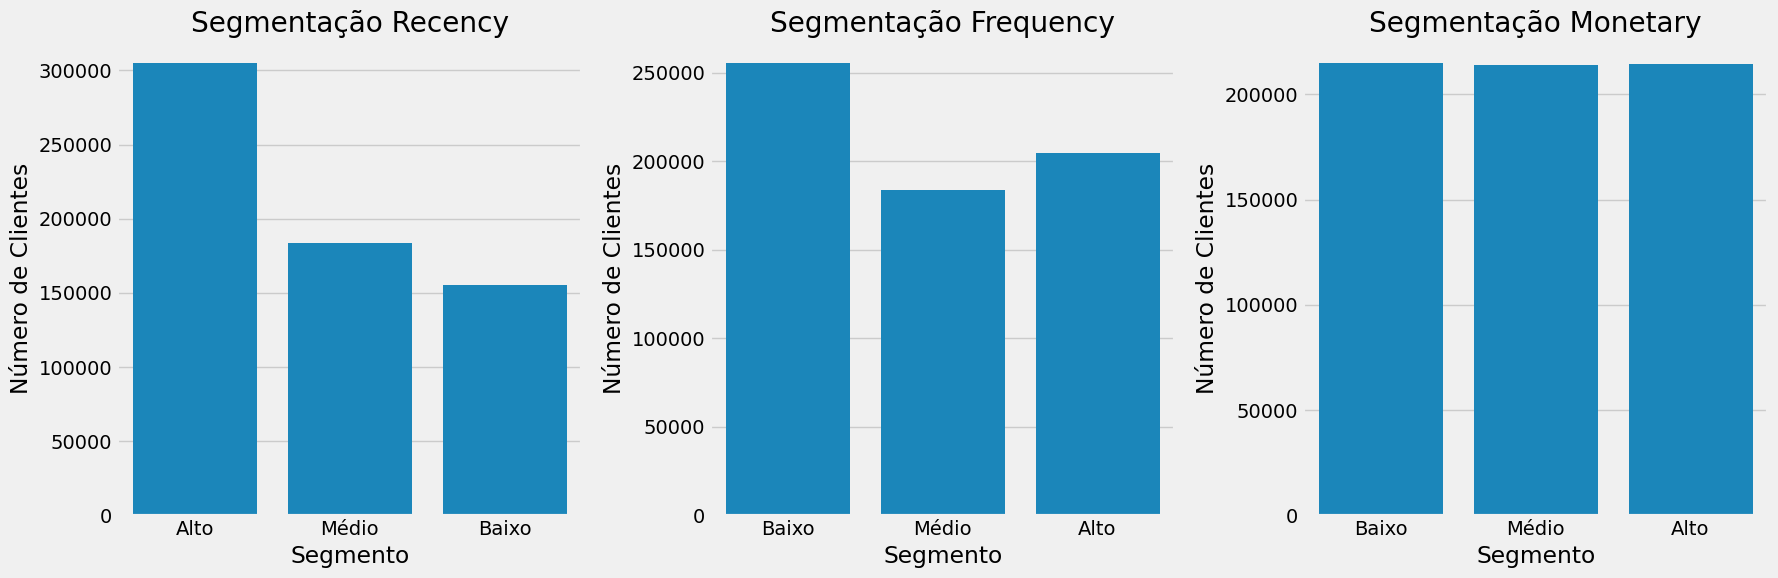

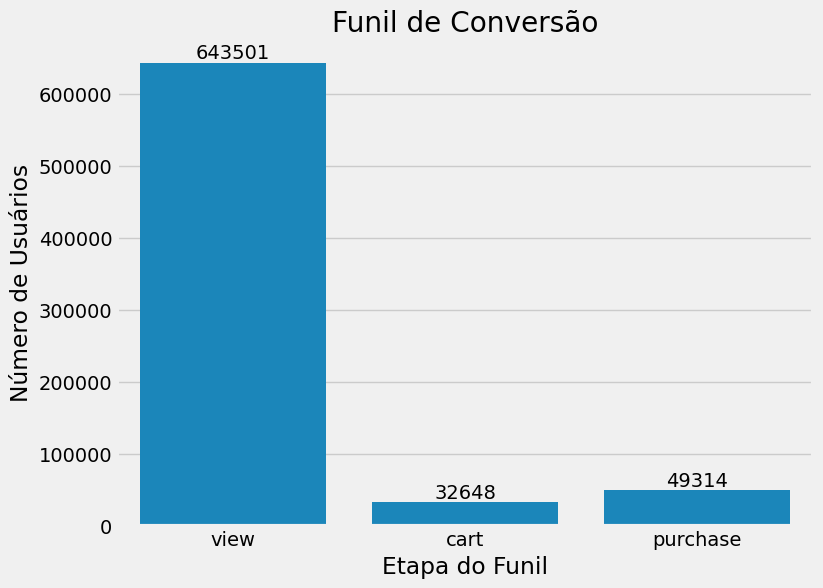

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para segmentação RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=rfm, x='R_Segment', ax=axes[0])
axes[0].set_title('Segmentação Recency')
axes[0].set_xlabel('Segmento')
axes[0].set_ylabel('Número de Clientes')

sns.countplot(data=rfm, x='F_Segment', ax=axes[1])
axes[1].set_title('Segmentação Frequency')
axes[1].set_xlabel('Segmento')
axes[1].set_ylabel('Número de Clientes')

sns.countplot(data=rfm, x='M_Segment', ax=axes[2])
axes[2].set_title('Segmentação Monetary')
axes[2].set_xlabel('Segmento')
axes[2].set_ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

# Gráfico de funil de conversão
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=funil, x='etapa', y='numero_usuarios', ax=ax)
ax.set_title('Funil de Conversão')
ax.set_xlabel('Etapa do Funil')
ax.set_ylabel('Número de Usuários')

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')

plt.show()

Para interpretar os gráficos de segmentação RFM (Recência, Frequência e Valor Monetário) e do funil de conversão, aqui estão os conceitos básicos:

**Segmentação RFM:**


*   Recência (R): Mede o quão recentemente um cliente realizou uma compra. Clientes com alta recência **tendem a ser mais valiosos**, pois é mais provável que estejam ainda engajados com a marca.
*   Frequência (F): Mede o número de vezes que o cliente comprou em um período de tempo determinado. Clientes que compram com mais frequência são** geralmente mais leais**.
* Valor Monetário (M): Refere-se ao total gasto pelo cliente. Clientes que gastam mais dinheiro são **considerados mais valiosos**.

**Interpretação:**

O gráfico RFM divide os clientes em segmentos baseados em sua recência, frequência e valor monetário. Clientes que pontuam alto em todas as três dimensões são seus clientes mais valiosos. Diferentes segmentos podem ser identificados para estratégias personalizadas, como reativação de clientes inativos ou retenção de clientes valiosos.



____________________


**Funil de Conversão:**

Ao examinar o gráfico do funil de conversão no documento, é possível identificar comportamentos incomuns, como o número de compras sendo maior que o número de itens adicionados ao carrinho. Este cenário pode indicar que os usuários estão comprando sem adicionar itens ao carrinho, ou pode haver múltiplas compras em uma única sessão.

**Identificação das Maiores Quedas**:


1.   **Visão Geral**:


*   O funil de conversão no gráfico representa as etapas que os usuários percorrem desde a sua entrada no site até a realização de uma ação final, como uma compra. Idealmente, esperaríamos que o número de transações diminuísse a cada etapa. Porém, neste dataset, pode haver uma anomalia onde o número de compras supera o de itens no carrinho.



2.   **Comportamentos Atípicos**


*   Se o gráfico mostrar que as compras superam os itens adicionados ao carrinho, isso pode sugerir que os usuários estão fazendo múltiplas compras sem passar pelas etapas intermediárias de maneira tradicional. Outra hipótese é que os usuários estejam usando diferentes fluxos de compra que não envolvem adicionar itens ao carrinho, como "comprar agora" ou funcionalidades similares

**Estratégias para Explorar e Otimizar**:


*   **Análise do Fluxo de Usuário**:  Revisar como os usuários estão navegando no site e como estão finalizando compras, especialmente se não estão seguindo o caminho tradicional de adicionar itens ao carrinho.
*   **Otimização da Jornada de Compra**: Facilitar e incentivar o uso das funcionalidades alternativas de compra, se estas estiverem mostrando bons resultados, ou entender e ajustar onde os usuários estão desviando do fluxo esperado.
* **Verificação de Dados**: Certificar-se de que os dados estão sendo capturados e reportados corretamente, para garantir que essa discrepância não seja resultado de erros de rastreamento ou processamento.


Com essas considerações, você pode melhorar o entendimento e a eficácia do seu funil de conversão, mesmo diante de comportamentos atípicos identificados nos dados.